In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()
ec_label1 = ['ICS', 'HCS']
ec_label2 = ['ics', 'hcs']

D = 2                   # dimensionality
L = 128                 # lineal size
lc = 16                 # correlation lenght
variance = [0.5, 2]     
realizations = 128      # number of samples

map_realization = 97    # change to display different realizations [0..127]
v = 1                   # contrast [0.1 .. ]
cmap = 'plasma'         # 'plasma', 'viridis', 'cividis', 'Blues', etc.

norm=38.65

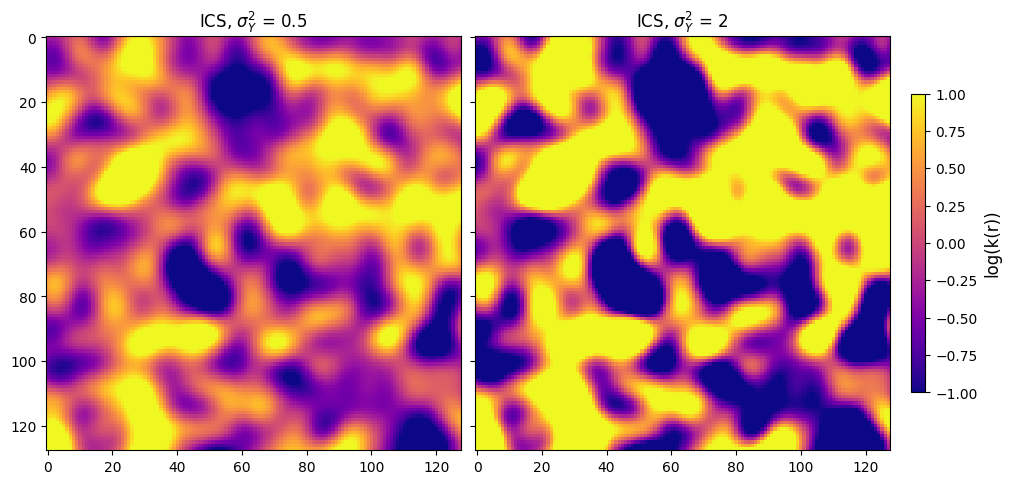

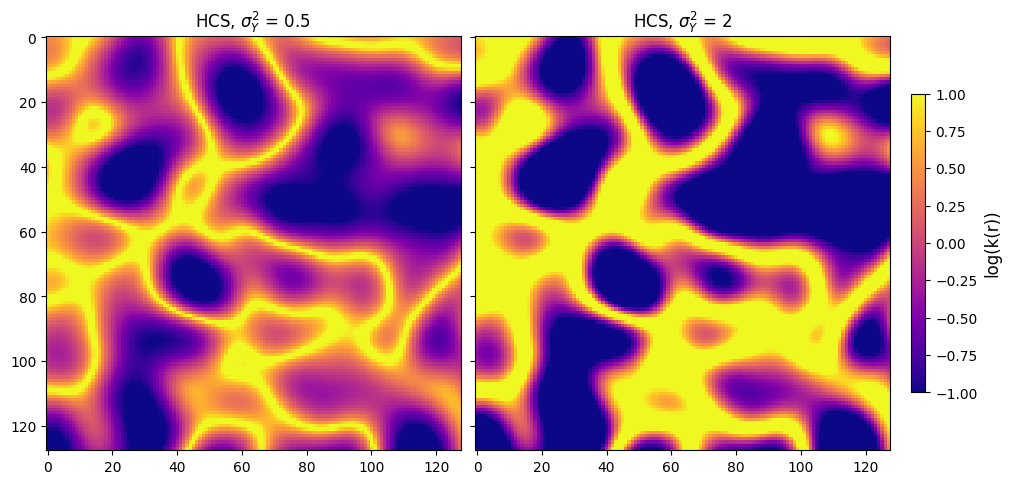

In [2]:
### Map visualization of log(k)

for ic in range(len(ec_label2)):
    fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 20), sharey=True)
    for ivar in range(len(variance)):
        kmap = np.load(cwd + '/medios_128Lcont/X_128L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')[map_realization]
        im = ax[ivar].imshow(np.log(kmap), cmap=cmap, vmin=-v, vmax=v)
        ax[ivar].set_title(ec_label1[ic]+', '+r"$\sigma^2_{Y}$"+' = '+str(variance[ivar]), fontsize=12)
    cb = fig.colorbar(im, shrink=0.15, orientation='vertical', pad=0.05)#, ax=ax.ravel().tolist())
    cb.set_label(label='log(k(r))', fontsize=12)

In [3]:
# Means fo ICS and HCS

k_ics = np.zeros(128)
k_hcs = np.zeros(128)
for ic in range(len(ec_label2)):
    for ireal in range(128):
        k = np.mean(np.load(cwd + '/medios_128Lcont/X_128L_' + ec_label2[ic] + '_' + '0.5' + '.npy')[ireal])
        if ic == 0:
            k_ics[ireal] = k
        else:
            k_hcs[ireal] = k

print(f'Arithmetic mean of ICS: {np.mean(k_ics):.2f}')
print(f'Arithmetic mean of HCS: {np.mean(k_ics):.2f}')


Arithmetic mean of ICS: 1.28
Arithmetic mean of HCS: 1.28


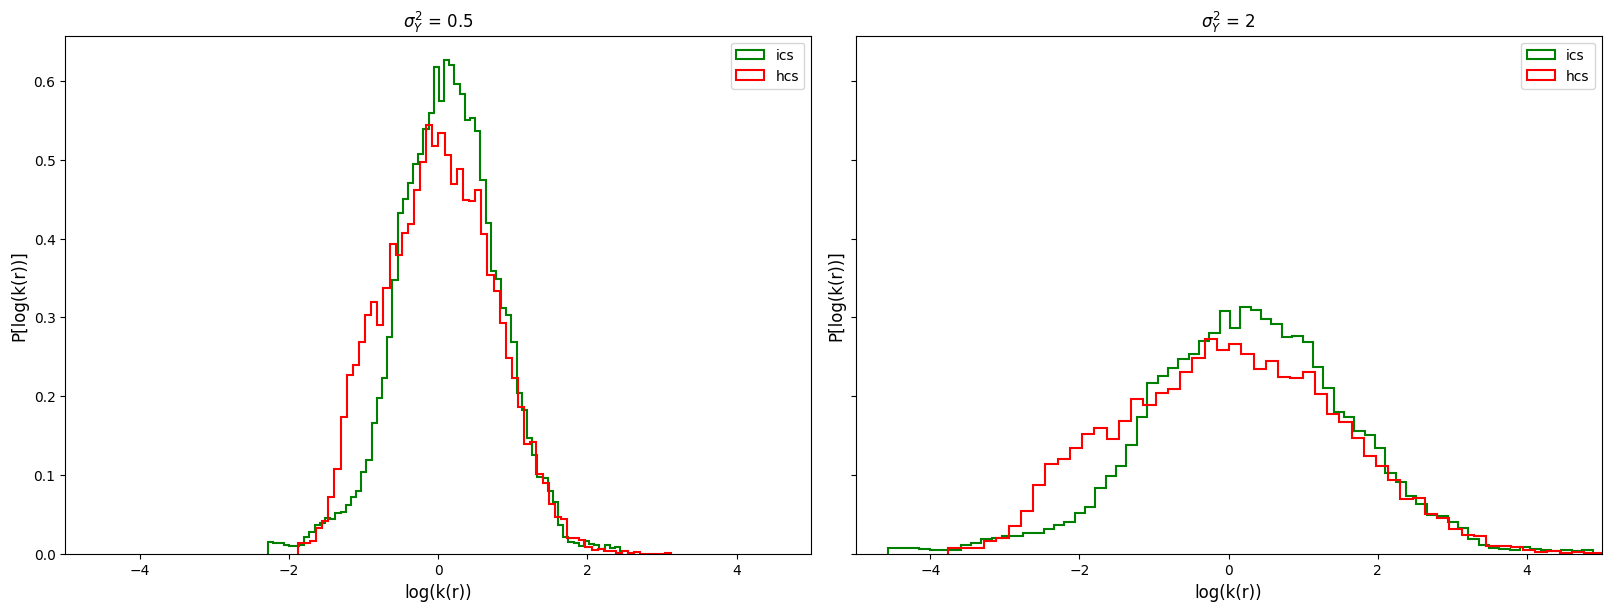

In [4]:
### Probability Densisty Functions (PDF) of log(k)         

color = ['g', 'r']
fig, ax = plt.subplots(1, 2, figsize=(16,6), layout='constrained', sharey=True)
for ivar in range(len(variance)):
    for ic in range(len(ec_label2)):
        kmap = np.load(cwd + '/medios_128Lcont/X_128L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')[map_realization]
        kmap = kmap.reshape(-1)
        ax[ivar].hist(np.log(kmap), bins='auto', density=True, histtype='step', color=color[ic], lw=1.5, label=ec_label2[ic])
        ax[ivar].set_xlabel('log(k(r))', fontsize=12)
        ax[ivar].set_ylabel('P[log(k(r))]', fontsize=12)
        ax[ivar].set_xlim(-5,5)
        ax[ivar].legend()
        ax[ivar].set_title(r"$\sigma^2_{Y}$" + ' = ' + str(variance[ivar]), fontsize=12)
plt.show()

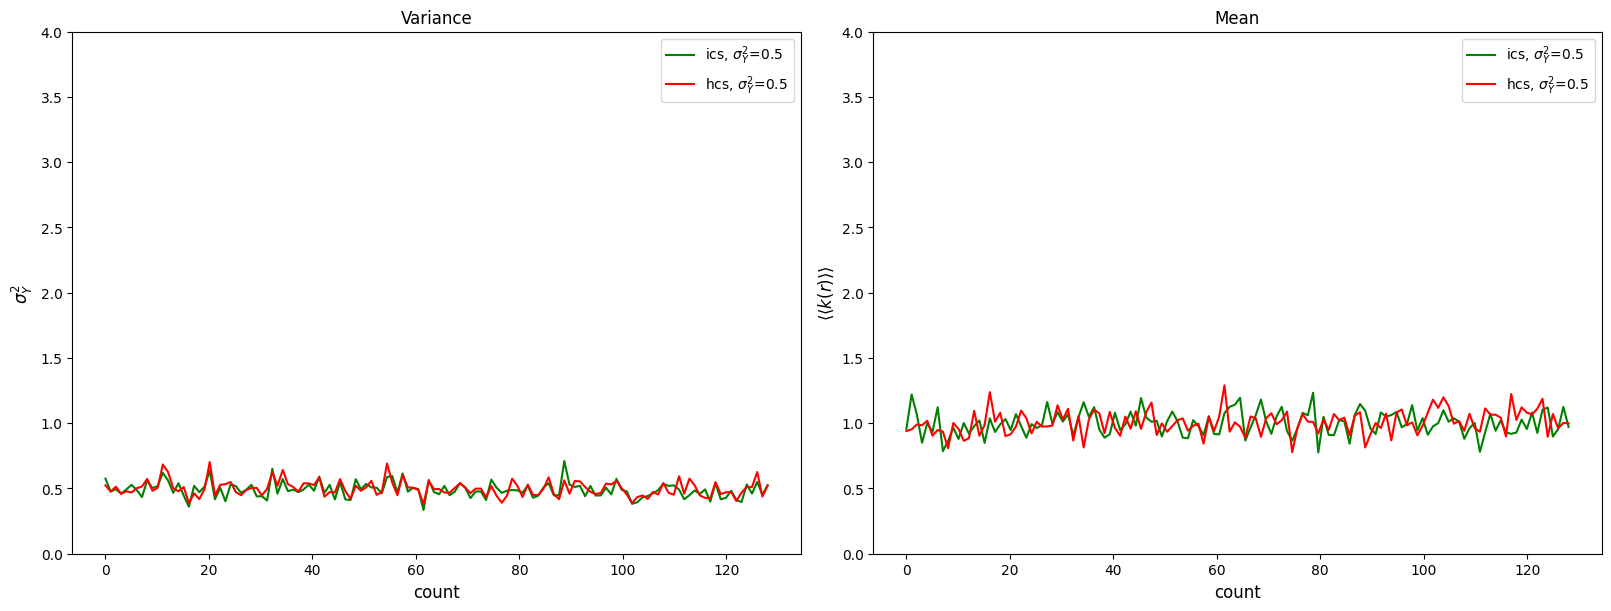

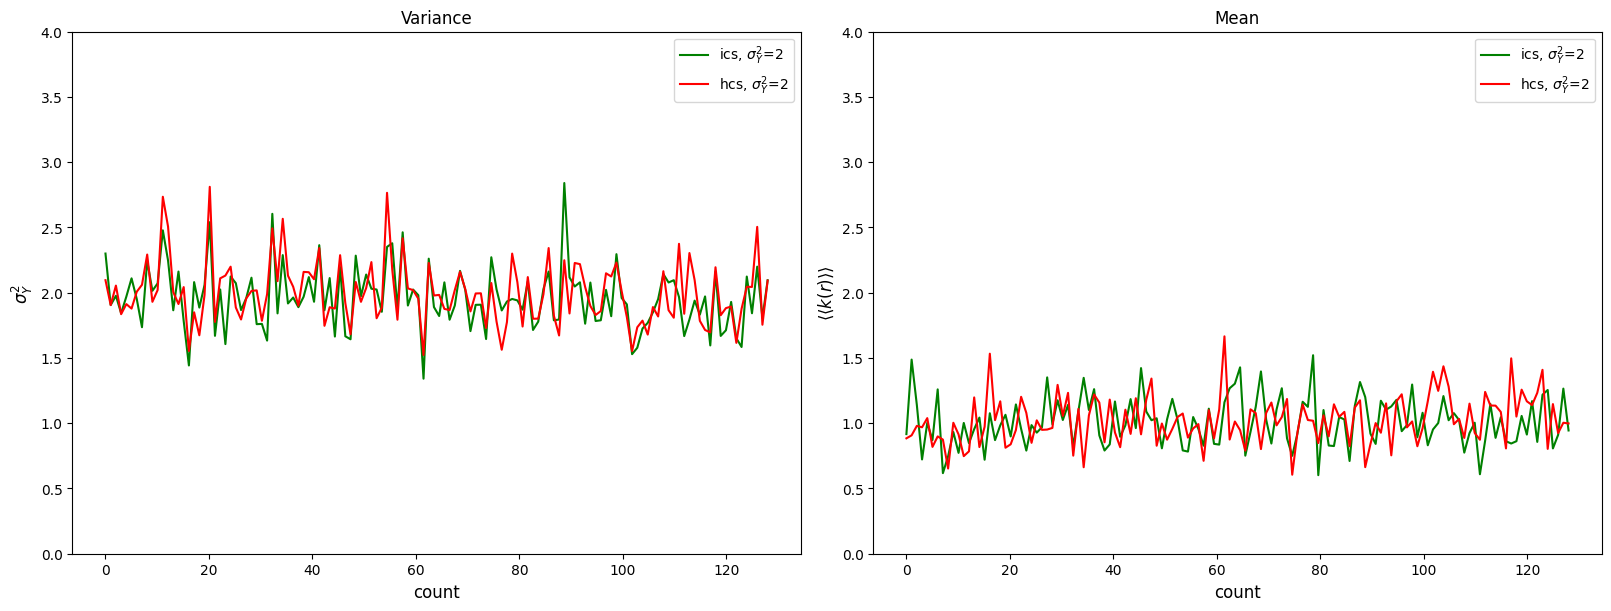

In [5]:
### Variance and mean plots

x_sim = np.linspace(0, 128, 128)
title = ['Variance', 'Mean']

for ivar in range(len(variance)):
    fig, ax = plt.subplots(1, 2, figsize=(16,6), layout='constrained', sharey=False)
    for ic in range(len(ec_label2)):
        var = np.array([])
        mean = np.array([])
        kmap = np.load(cwd + '/medios_128Lcont/X_128L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')
        for ireal in range(128):
            var = np.append(var, np.var(np.log(kmap[ireal])))
            mean = np.append(mean, np.exp(np.mean(np.log(kmap[ireal]))))
            
        ax[0].plot(x_sim, var, label=ec_label2[ic] + ', ' + r"$\sigma^2_{Y}$" + '=' + str(variance[ivar]), color=color[ic])
        ax[0].legend(loc='best', fontsize=10)
        ax[0].set_xlabel('count', fontsize=12)
        ax[0].set_ylabel(r"$\sigma^2_{Y}$", fontsize=12)
        ax[0].set_ylim(0,4)
        ax[0].set_title(title[0])
     
        ax[1].plot(x_sim, mean, label=ec_label2[ic] + ', ' + r"$\sigma^2_{Y}$" + '=' + str(variance[ivar]), color=color[ic])
        ax[1].legend(loc='best', fontsize=10)
        ax[1].set_xlabel('count', fontsize=12)
        ax[1].set_ylabel(r'$⟨⟨k(r)⟩⟩$', fontsize=12)
        ax[1].set_ylim(0,4)
        ax[1].set_title(title[1])
    plt.show()


1.2742200948297977
1.293639586493373


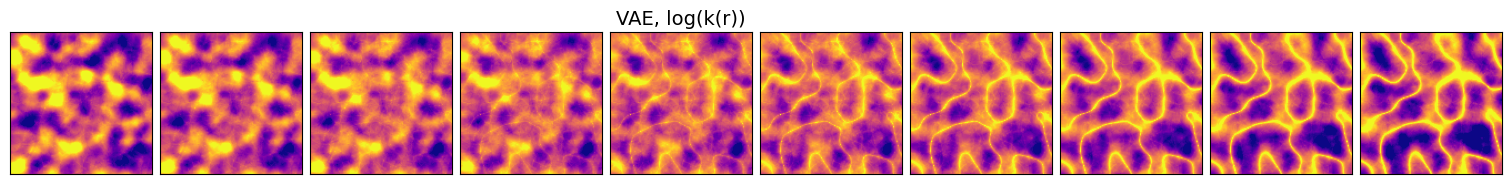

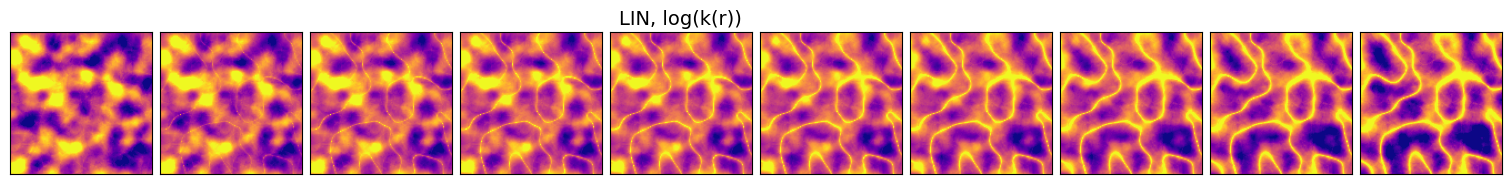

In [6]:
### Plot log(k(r)) Variational Autoencoder and lineal regression output

vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

method = [vae, lin]
label = ['VAE', 'LIN']

#cmap = 'inferno'
#v = 1

for imet in range(len(method)):
    fig, ax = plt.subplots(1, 10, figsize=(15,15), sharey=True, layout = 'constrained')
    for ireal in range(10):
        ax[ireal].imshow(np.log((norm*method[imet])[ireal]), vmin=-1, vmax=1, cmap=cmap)
        ax[ireal].set_yticks([])
        ax[ireal].set_xticks([])
        ax[4].set_title(label[imet] + ', log(k(r))', fontsize=14)

print(np.mean(method[0][0])*norm)
print(np.mean(method[0][9])*norm)

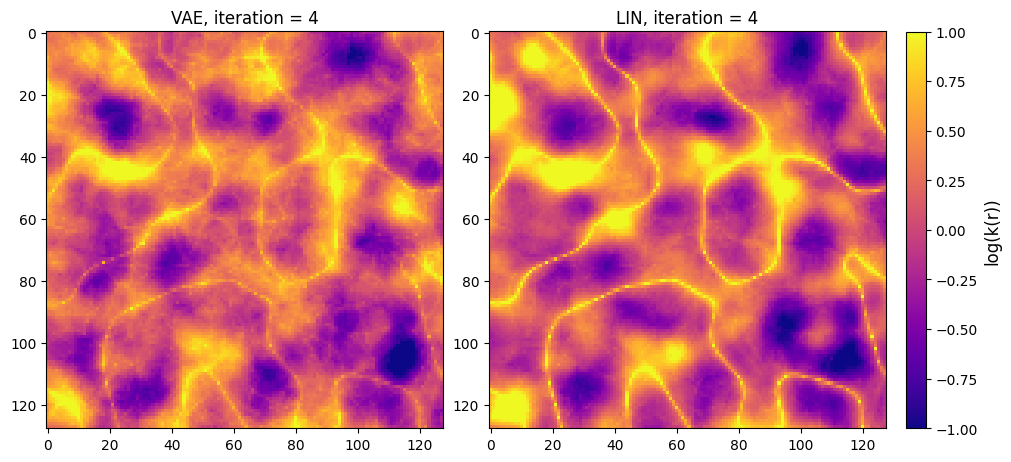

In [7]:
### Kmap 128x128 for output of VAE and LIN method

vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

iteration = 4

fig, ax = plt.subplots(1, 2, figsize=(10,10), layout='constrained')
for imet in range(len(method)):
    k = np.log((norm*method[imet])[iteration])
    im = ax[imet].imshow(k, vmin=-v, vmax=v, cmap=cmap)
    ax[imet].set_title(label[imet] + ', iteration = ' + str(iteration))
    #ax[1].set_title('Lineal Regression, ' + 'iteration=' + str(iteration))
cb = fig.colorbar(im, shrink=.4)
cb.set_label(label='log(k(r))', fontsize=12)

[0.05576913 0.09486815 0.12967241 0.14924344 0.15462047 0.15131557
 0.14291048 0.12110135 0.08776364 0.04924165]
[0.05576913 0.09378561 0.1182188  0.13321091 0.14040428 0.14038342
 0.13300592 0.1173466  0.09120354 0.04924165]
[0.59263885 0.52681279 0.46755055 0.4174329  0.39517018 0.40511909
 0.44806632 0.50373477 0.56717008 0.63745028]
[0.59263885 0.52944815 0.49018866 0.46713194 0.45782205 0.4615249
 0.47847056 0.50998348 0.55960226 0.63745028]
[0.35122079 0.27753174 0.21860352 0.17425023 0.15615948 0.16412148
 0.20076343 0.25374874 0.32168192 0.40634283]
[0.35122079 0.28031534 0.24028492 0.21821225 0.20960104 0.21300524
 0.22893408 0.26008314 0.3131547  0.40634283]


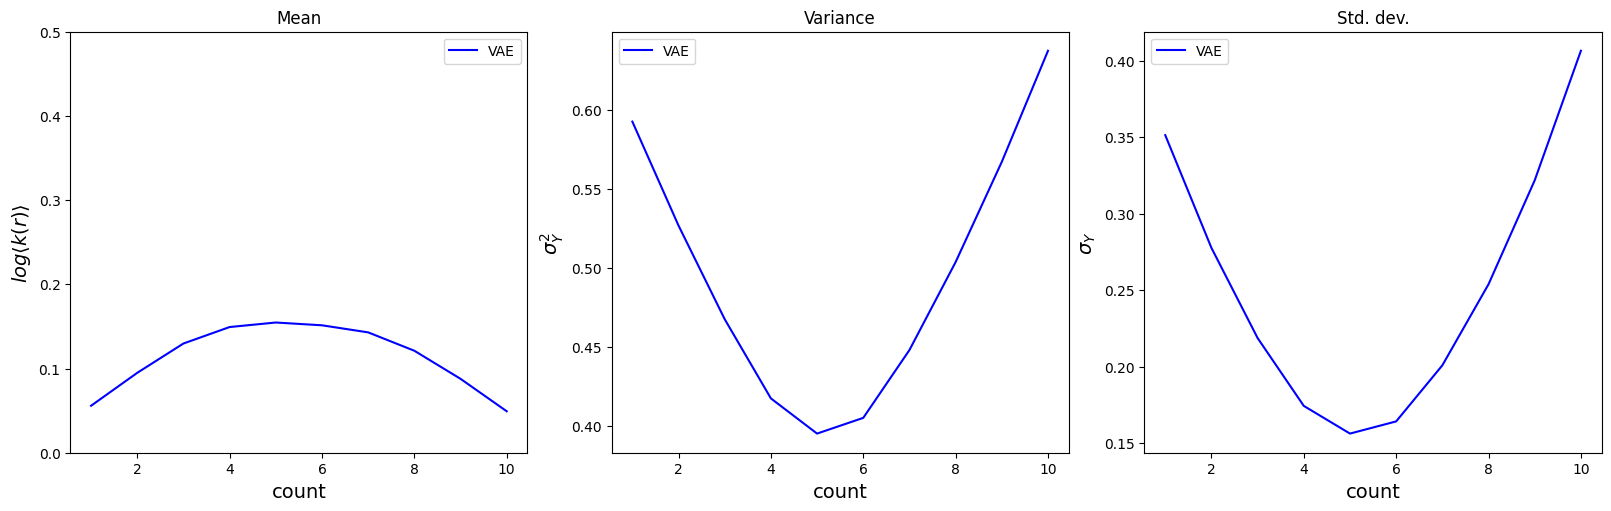

In [8]:
### Statistics 128x128

vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

vae_mean, vae_std, vae_var = [],[],[]
lin_mean, lin_std, lin_var = [],[],[]

x_real = np.linspace(1, 10, 10)

for ireal in range(10):
    vae_mean = np.append(vae_mean, np.mean(np.log(vae[ireal]*norm)))
    vae_std =  np.append(vae_std, np.std(np.log(vae[ireal])))
    vae_var = np.append(vae_var, np.var(np.log(vae[ireal])))

    lin_mean = np.append(lin_mean, np.mean(np.log(lin[ireal]*norm)))
    lin_std =  np.append(lin_std, np.std(np.log(lin[ireal])))
    lin_var = np.append(lin_var, np.var(np.log(lin[ireal])))

metrics_vae = [vae_mean, vae_std, vae_var]
metrics_lin = [lin_mean, lin_std, lin_var]

title = ['Mean', 'Variance', 'Std. dev.']
ylabel = [r'$log ⟨k(r)⟩$', r"$\sigma^2_{Y}$", r"$\sigma_{Y}$"]

fix, ax = plt.subplots(1, 3, figsize=(16,5), layout='constrained', sharey=False)
for i in range(3):
    ax[i].plot(x_real, metrics_vae[i], color='b', label='VAE')
    #ax[i].plot(x_real, metrics_lin[i], color='g', label='LIN')
    ax[i].legend()
    ax[i].set_title(title[i])
    ax[i].set_ylabel(ylabel[i], fontsize=14)
    ax[i].set_xlabel('count', fontsize=14)
    ax[0].set_ylim(0,0.5)

print(metrics_vae[0])
print(metrics_lin[0])
print(metrics_vae[1])
print(metrics_lin[1])
print(metrics_vae[2])
print(metrics_lin[2])


    #### normalizar los estadios intermedios con la media aritmetica, todas la estapas intermedias deben tener la misma media, la conectividad debe aumentar de forma continua.
    #### Binarizar, y sacar indicadores. 

    # Graficar: 


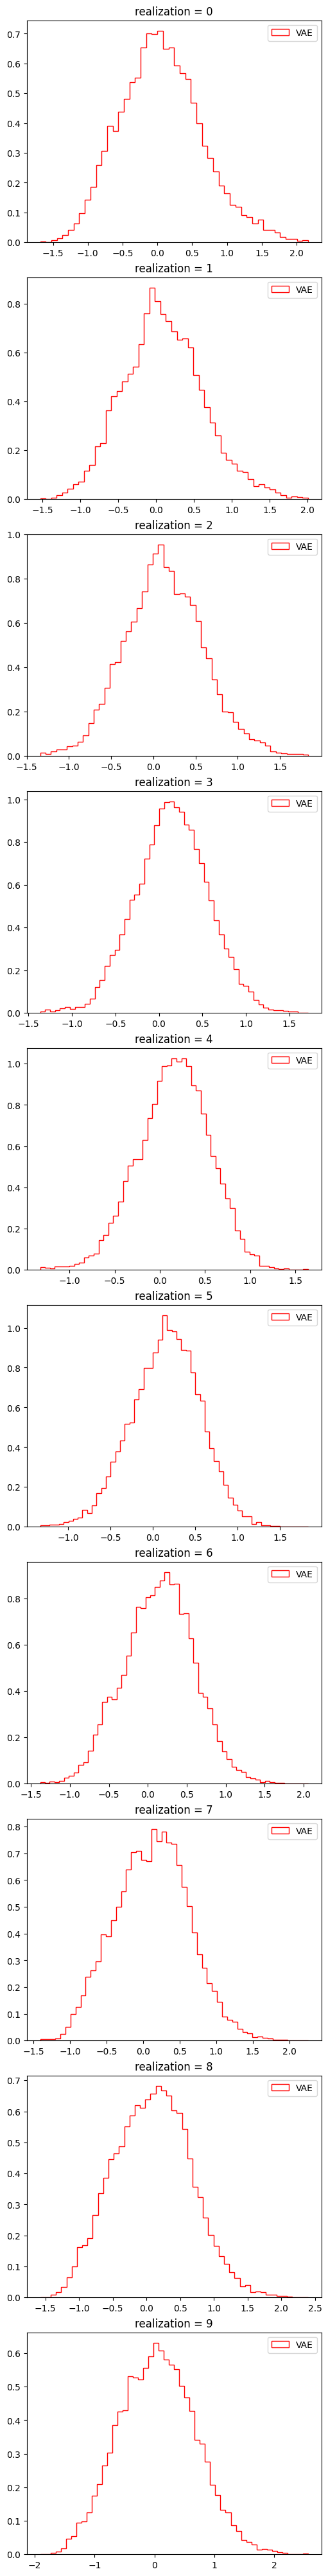

In [15]:
### PDFs 128x128 output LIN VAE

vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

fig, ax = plt.subplots(10, 1, figsize=(5,40), sharex=False, layout = 'constrained')

for ireal in range(10):
    ax[ireal].hist(np.log(38.65*vae[ireal]).reshape(-1), bins='scott', density=True, histtype='step', color='red', label='VAE')
    
    #ax[ireal].hist(np.log(38.65*lin[ireal]).reshape(-1), bins='scott', density=True, histtype='step', color='blue', label='LIN')

    ax[ireal].set_title('realization = ' + str(ireal))
    #ax[ireal].set_xlim([0, 0.2])
    ax[ireal].legend()

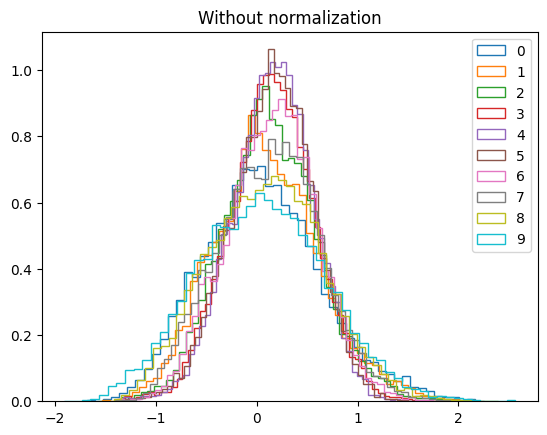

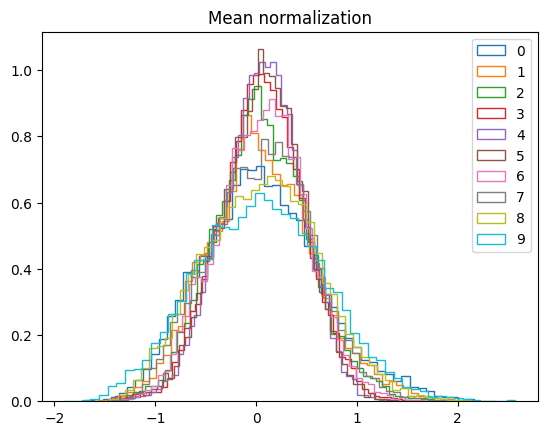

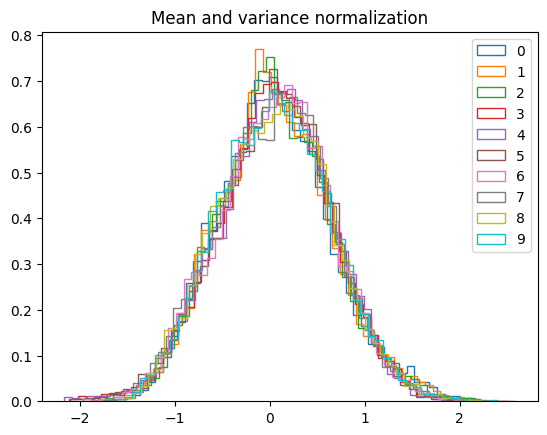

In [5]:
### PDFs 128x128 output LIN VAE

vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

#fig, ax = plt.subplots(10, 1, figsize=(5,40), sharex=False, layout = 'constrained')

mean_0 = np.mean(np.log(38.65*vae[0]))   
mean_5 = np.mean(np.log(38.65*vae[5]))
mean_9 = np.mean(np.log(38.65*vae[9]))

std_0 = np.std(np.log(38.65*vae[0]))   
std_5 = np.std(np.log(38.65*vae[5]))
std_9 = np.std(np.log(38.65*vae[9]))

# Without normalization
for ireal in range(10):
    plt.hist(np.log(38.65*vae[ireal]).reshape(-1), bins='scott', density=True, histtype='step', label=str(ireal))
    plt.title('Without normalization')
plt.legend()
plt.show()

# Mean normalization
for ireal in range(10):
    mean = np.mean(np.log(38.65*vae[ireal]))
    plt.hist((np.log(38.65*vae[ireal]).reshape(-1))-mean+mean_0, bins='scott', density=True, histtype='step', label=str(ireal))
    plt.title('Mean normalization')
plt.legend()
plt.show()

# Mean and variance normalization
for ireal in range(10):
    mean = np.mean(np.log(38.65*vae[ireal]))
    std =  np.std(np.log(38.65*vae[ireal]))
    plt.hist((((((np.log(38.65*vae[ireal]).reshape(-1))-mean)/std)*std_0)+mean_0), bins='scott', density=True, histtype='step', label=str(ireal))
    plt.title('Mean and variance normalization')
plt.legend()
plt.show() 
 

In [ ]:
fig, ax = plt.subplots(10, 1, figsize=(30,90), layout='constrained')

for ireal in range(10):
    mean = np.mean(np.log(38.65*vae[ireal]))
    std =  np.std(np.log(38.65*vae[ireal]))
    ax[ireal].imshow((((((np.log(38.65*vae[ireal]).reshape(-1))-mean)/std)*std_0)+mean_0).reshape(128,128,1))#, density=True, histtype='step', label=str(ireal))
    #plt.title('Mean and variance normalization')
    #plt.legend()
    #plt.show()
    #plt.close()

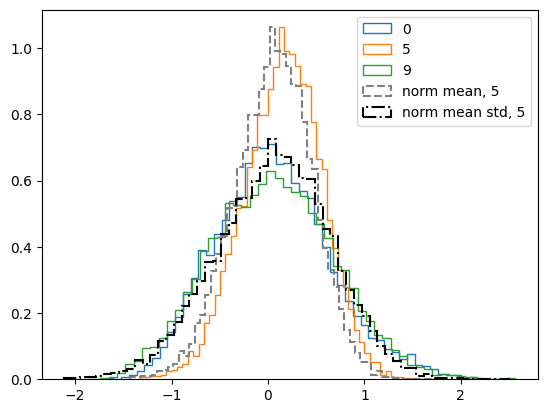

In [ ]:
plt.hist(np.log(38.65*vae[0]).reshape(-1), bins='scott', density=True, histtype='step', label=str(0))
plt.hist(np.log(38.65*vae[5]).reshape(-1), bins='scott', density=True, histtype='step', label=str(5))

plt.hist(np.log(38.65*vae[9]).reshape(-1), bins='scott', density=True, histtype='step', label=str(9))

mean_0 = np.mean(np.log(38.65*vae[0]))   
mean_5 = np.mean(np.log(38.65*vae[5]))
mean_9 = np.mean(np.log(38.65*vae[9]))

std_0 = np.std(np.log(38.65*vae[0]))   
std_5 = np.std(np.log(38.65*vae[5]))
std_9 = np.std(np.log(38.65*vae[9]))

plt.hist((np.log(38.65*vae[5]).reshape(-1))-mean_5+mean_0, bins='scott', density=True, histtype='step', label='norm mean, ' + str(5), color='grey', linestyle='--', linewidth=1.5)
plt.hist((((((np.log(38.65*vae[5]).reshape(-1))-mean_5)/std_5)*std_0)+mean_0), bins='scott', density=True, histtype='step', label='norm mean std, ' + str(5), color='black', linestyle='-.', linewidth=1.5)

plt.legend()

In [9]:
# Separate into individual matrix of 128x128 for flow simulation

import numpy as np
import os

# Save in a separate numpy file each k map (VAE)
vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')

parent_folder = ['for_sim_norm_ref/vae', 'for_sim_norm_ref/lin']

# kmap_vae = [vae[i] for i in range(10)]
# kmap_lin = [lin[i] for i in range(10)]

mean_0 = np.mean(np.log(38.65*vae[0]))   
mean_5 = np.mean(np.log(38.65*vae[5]))
mean_9 = np.mean(np.log(38.65*vae[9]))

std_0 = np.std(np.log(38.65*vae[0]))   
std_5 = np.std(np.log(38.65*vae[5]))
std_9 = np.std(np.log(38.65*vae[9]))


for i in range(10):
    mean = np.mean(np.log(38.65*vae[i]))
    std =  np.std(np.log(38.65*vae[i]))
    os.makedirs(os.path.join(parent_folder[0], str(i)), exist_ok=True)

    np.save(os.path.join(parent_folder[0], str(i), f'k.npy'), 
            (((((38.65*vae[i])-mean)/std)*std_0)+mean_0).reshape(128,128,1)) # kmap normalized
        
        #np.save(os.path.join(parent_folder[j], str(i), f'k.npy'), (38.65*vae[i]).reshape(128, 128, 1)) #without normalization

# Save in a separate numpy file each k map (LIN)
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

mean_0_l = np.mean(np.log(38.65*lin[0]))   
mean_5_l = np.mean(np.log(38.65*lin[5]))
mean_9_l = np.mean(np.log(38.65*lin[9]))

std_0_l = np.std(np.log(38.65*lin[0]))   
std_5_l = np.std(np.log(38.65*lin[5]))
std_9_l = np.std(np.log(38.65*lin[9]))

for i in range(10):
    mean_l = np.mean(np.log(38.65*lin[i]))
    std_l =  np.std(np.log(38.65*lin[i]))
    os.makedirs(os.path.join(parent_folder[1], str(i)), exist_ok=True)

    np.save(os.path.join(parent_folder[1], str(i), f'k.npy'), 
            (((((38.65*lin[i])-mean_l)/std_l)*std_0_l)+mean_0_l).reshape(128,128,1)) # kmap normalized


/tmp/ipykernel_5341/2807711376.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kdis_v[ireal] = norm*kdis
/tmp/ipykernel_5341/2807711376.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kave_v[ireal] = norm*kave


0.11693288071193089
0.11675135433645581
0.11701733802299737
0.11206957764723928
0.11193870060914161
0.11210782973158695


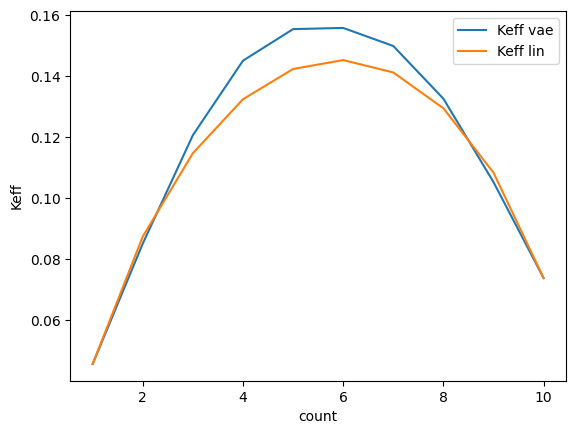

In [5]:
### Keff 128x128 without normalization

cwd = os.getcwd()
subdir = ['/medios_128Lcont/post_sim/']
output_folders = ['vae', 'lin']

x_real = np.linspace(1, 10, 10)

for folder in output_folders:
    keff_v = np.zeros(10)
    kdis_v = np.zeros(10)
    kave_v = np.zeros(10)
    for ireal in range(10):
        keff = np.loadtxt(cwd + subdir[0] + folder + '/' + str(ireal) + '/SolverRes.txt')[0]
        kdis = np.load(cwd + subdir[0] + folder + '/' + str(ireal) + '/KpostProcess/Kd128.npy')
        kave = np.load(cwd + subdir[0] + folder + '/' + str(ireal) + '/KpostProcess/Kv128.npy')
        
        keff_v[ireal] = norm*keff
        kdis_v[ireal] = norm*kdis
        kave_v[ireal] = norm*kave

    print(np.mean(np.log(keff_v)))
    print(np.mean(np.log(kdis_v)))
    print(np.mean(np.log(kave_v)))

    plt.plot(x_real, np.log(keff_v), label='Keff' + ' ' + folder)
    #plt.plot(x_real, np.log(kdis_v), color='g', label='Kdis' + ' ' + folder)
    #plt.plot(x_real, np.log(kave_v), color='b', label='Kave' + ' ' + folder)

    plt.xlabel('count')
    plt.ylabel('Keff')
    plt.legend()
plt.show()

#print(keff_v)
#print(kdis_v)
#print(kave_v)

3.7092764518540213
3.70910080955503
3.709360706627998
3.7044942775923224
3.7043678264268918
3.7045350543344733


/tmp/ipykernel_4173/3542836428.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kdis_v[ireal] = norm*kdis
/tmp/ipykernel_4173/3542836428.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kave_v[ireal] = norm*kave


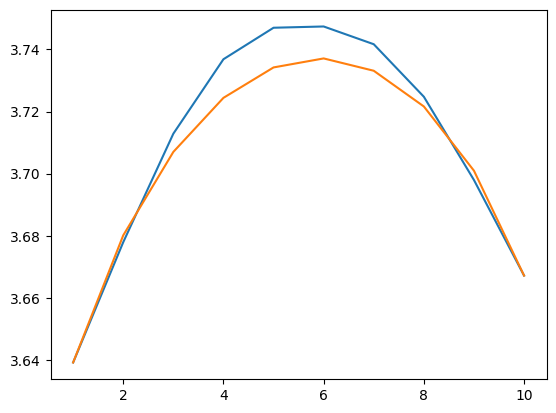

In [6]:
### Keff 128x128 with normalization

subdir = ['/medios_128Lcont/post_sim_norm/']
output_folders = ['vae_norm', 'lin_norm', ]

x_real = np.linspace(1, 10, 10)

for folder in output_folders:
    keff_v = np.zeros(10)
    kdis_v = np.zeros(10)
    kave_v = np.zeros(10)
    for ireal in range(10):
        keff = np.loadtxt(cwd + subdir[0] + folder + '/' + str(ireal) + '/SolverRes.txt')[0]
        kdis = np.load(cwd + subdir[0] + folder + '/' + str(ireal) + '/KpostProcess/Kd128.npy')
        kave = np.load(cwd + subdir[0] + folder + '/' + str(ireal) + '/KpostProcess/Kv128.npy')
        
        keff_v[ireal] = norm*keff
        kdis_v[ireal] = norm*kdis
        kave_v[ireal] = norm*kave

    print(np.mean(np.log(keff_v)))
    print(np.mean(np.log(kdis_v)))
    print(np.mean(np.log(kave_v)))

    plt.plot(x_real, np.log(keff_v), label='Keff' + ' ' + folder)


In [ ]:
cwd = os.getcwd()
output_folders = ['lin', 'lin_bin', 'vae', 'vae_bin', 'vae_connect']
output_folders_1 = ['lin', 'lin_bin', 'vae', 'vae_bin']
subdir = ['/for_sim/', '/for_sim_norm/', '/post_sim/']

cmap = 'inferno'
v = 1

for folder in output_folders_1:
    fig, ax = plt.subplots(1, 10, figsize=(15,15), sharey=True, layout = 'constrained')
    for ireal in range(10):
        kmap = np.load(cwd + subdir[1] + folder + '/' + str(ireal) + '/k.npy')
        
        ax[ireal].imshow(np.log(kmap), vmin=-v, vmax=v, cmap=cmap)
        ax[ireal].set_yticks([])
        ax[ireal].set_xticks([])
        ax[4].set_title(folder + ', log(k(r))', fontsize=14)



In [ ]:
cwd = os.getcwd()
output_folders = ['lin', 'lin_bin', 'vae', 'vae_bin', 'vae_connect']

cmap = 'inferno'
v = 1

for folder in output_folders:
    fig, ax = plt.subplots(1, 10, figsize=(15,15), sharey=True, layout = 'constrained')
    for ireal in range(10):
        kmap = np.load(cwd + '/post_sim/' + folder + '/' + str(ireal) + '/k.npy')
        
        ax[ireal].imshow(np.log(kmap), vmin=-v, vmax=v, cmap=cmap)
        ax[ireal].set_yticks([])
        ax[ireal].set_xticks([])
        ax[4].set_title(folder + ', log(k(r))', fontsize=14)


In [ ]:
### Graficar Kperm vs realization en VAE, comparar con Kdiss y Kaver: LOS GRAFICOS DE Keff DE LAS SALIDAS DE VAE SON MUY SIMILARES, PARABOLICAS CON UN MAX.

### Ver ruido: es por el tamano de los medios, en medios de 1024 no hay ruido.

### Binarizar, y sacar indicadores de conect, Revisar Carrerar and Knubdy 2005.... pc = 0.31 para 3D y 0.59 para 2D. HACER.

### Normalizar salidas de VAE y luego correr simulador. HECHO no hay diferencia!. OK.

### Sacar flujo al metodo lineal y graficar. OK.


###....Porque el aumento de Keff debe ser lineal?? pensar en reordenamiento, si todos los canales de Keff fueran paralelos al flujo la Keff seria mucho mayor.
###....pensar de rotar los medios para ver como queda Keff. MEDIOS ROTADOS 90°. OK.

### Graficar mapas, luego de normalizar. ECHO, LOS MAPAS SE VEN BIEN. OK.

### Reunion ALE Feb 28/02/2025.

'''
### REFINAR los medios A LAS SALIDAS LIN y VAE, refinamiento grado 4 u 8. Para luego BINARIZAR y calcula indicadores de connect.

### Recucir lc para que exitan mas caminos de alta K que conecten las entradas con las salidas, por ejemplo lc = 4, 8. Por ej
en paper de conectividad y escala el medio es de 1024 y el lc de 16 donde existen varios caminos que conectan entreda y salida.

### Las etapas intermedias deberian tener el mismo histograma.

### Probar GPUs de TUPAC y Google Colab con el codigo VAE para poder correr medios mas grandes y chequear su rendimiento.

comentarios Ale

- Refinar grado 8 para calcular Keff en medios de 128: para evitar efectos de discretización, permitiendo que en la ECA las celdas más permeables
se conecten mejor (efecto escalerita en el cual se tiene un camino fino de alta K pero las caras de la celda no son contiguas entonces la K final
no es tan alta)

- Con los medios refinados, luego binarizar para calcular los indicadores de conectividad que serán más representativos ya que las caras estan más
conectadas, se evita usar el VAE en dimensionalidad muy alta. No tiene sentido que la Keff sea parabolica, cuanto mas conectado es el medio mas 
alto es el Keff.

- Reducir el lc para mejorar la conectividad de las caras de entrada y salida, ya que hay canales que no unen las caras de entrada y salida, ver 
resultados paper conectividad y escala.

'''
'''
for_sim_norm_ref: VAE refinamiento: 8, running



'''

### vae Ok 
### vae connect OK
### lin OK
### vae bin OK
### lin bin ok


### vae norm ok
### vae norm connect running



In [ ]:
### Rotate npy matrix 90 degrees

# Load the matrix from an .npy file
matrix = np.load("matrix.npy")

# Rotate 90 degrees to the right (clockwise)
rotated_matrix = np.rot90(matrix, k=-1)

# Save the rotated matrix back if needed
np.save("rotated_matrix.npy", rotated_matrix)

# Print the result
print(rotated_matrix)



In [7]:
# Separate into individual rotated (90º) matrix of 128x128 for flow simulation

import numpy as np
import os

# Save in a separate numpy file each k map (VAE)
vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')

parent_folder = ['for_sim_norm_rot/vae', 'for_sim_norm_rot/lin']

# kmap_vae = [vae[i] for i in range(10)]
# kmap_lin = [lin[i] for i in range(10)]

mean_0 = np.mean(np.log(38.65*vae[0]))   
mean_5 = np.mean(np.log(38.65*vae[5]))
mean_9 = np.mean(np.log(38.65*vae[9]))

std_0 = np.std(np.log(38.65*vae[0]))   
std_5 = np.std(np.log(38.65*vae[5]))
std_9 = np.std(np.log(38.65*vae[9]))

for ireal in range(10):
    mean = np.mean(np.log(38.65*vae[ireal]))
    std =  np.std(np.log(38.65*vae[ireal]))
    os.makedirs(os.path.join(parent_folder[0], str(ireal)), exist_ok=True)

    np.save(os.path.join(parent_folder[0], str(ireal), f'k.npy'), 
            np.rot90(((((((38.65*vae[ireal])-mean)/std)*std_0)+mean_0).reshape(128,128,1)),1)) # kmap normalized
        
        #np.save(os.path.join(parent_folder[j], str(ireal), f'k.npy'), (38.65*vae[ireal]).reshape(128, 128, 1)) #without normalization

# Save in a separate numpy file each k map (LIN)
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

mean_0_l = np.mean(np.log(38.65*lin[0]))   
mean_5_l = np.mean(np.log(38.65*lin[5]))
mean_9_l = np.mean(np.log(38.65*lin[9]))

std_0_l = np.std(np.log(38.65*lin[0]))   
std_5_l = np.std(np.log(38.65*lin[5]))
std_9_l = np.std(np.log(38.65*lin[9]))

for ireal in range(10):
    mean_l = np.mean(np.log(38.65*lin[ireal]))
    std_l =  np.std(np.log(38.65*lin[ireal]))
    os.makedirs(os.path.join(parent_folder[1], str(ireal)), exist_ok=True)

    np.save(os.path.join(parent_folder[1], str(ireal), f'k.npy'), 
            np.rot90(((((((38.65*lin[ireal])-mean_l)/std_l)*std_0_l)+mean_0_l).reshape(128,128,1)),1)) # kmap normalized